# Exercise 7
Benjamin Linnik


# Instructions

1. Use 64-bit machine with Python 3.6.4 or similar
2. run 'python3 standalone.py' from the directory where 'best_est.pkl' and 'comp_testX.dat' are located
3. Install needed packages if needed: scipy, numpy, sklearn and others if asked with "pip3 install 'packagename'"
4. After running the standalone version a file named 'comp_testY_Linnik.dat' should appear in the same folder. You can find the predicted values for y in this file.
5. Have fun :)

Alternativally, if you want, you can run this Jupyter notebook with Python3.

Download all the source here:


# Description and storytelling

## Theory

Gradient Boosted Regression Trees (GBRT) or shorter Gradient Boosting is a flexible non-parametric statistical learning technique for classification and regression. Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques as well as utilities for common tasks such as model selection, feature extraction, and feature selection. Scikit-learn provides two estimators for gradient boosting: GradientBoostingClassifier and GradientBoostingRegressor. Both are located in the sklearn.ensemble package.

### Boosting

[Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

The purpose of boosting is to sequentially apply the weak classification algorithm to repeatedly modified versions of the data, thereby producing a sequence of weak classifiers $G_m(x)$, $m = 1, 2, ... , M$.
### Stagewise Additive Modeling

Boosting builds an additive model:

$$F(x) = \sum_{m=1}^M \beta_m b(x; \gamma_m)$$

where $b(x; \gamma_m)$ is a tree and $\gamma_m$ parameterizes the splits.  With boosting, the parameters, $(\beta_m, \gamma_m)$ are fit in a *stagewise* fashion.  This slows the process down, and overfits less quickly.

### Gradient Boosting Algorithm

In pseudocode:

1. Fit a model to the data, $F_1(x) = y$
2. Fit a model to the residuals, $h_1(x) = y - F_1(x)$
3. Create a new model, $F_2(x) = F_1(x) + h_1(x)$

It’s not hard to see how we can generalize this idea by inserting more models that correct the errors of the previous model. Specifically,

$$F(x) = F_1(x) \mapsto F_2(x) = F_1(x) + h_1(x) \dots \mapsto F_M(x) = F_{M-1}(x) + h_{M-1}(x)$$
where $F_1(x)$ is an initial model fit to y

Since we initialize the procedure by fitting $F_1(x)$, our task at each step is to find $h_m(x) = y - F_m(x)$.

$h_m$ is just a “model”. Nothing in our definition requires it to be a tree-based model. This is one of the broader concepts and advantages to gradient boosting. It’s really just a framework for iteratively improving any weak learner. So in theory, a well coded gradient boosting module would allow you to “plug in” various classes of weak learners at your disposal. In practice however, $h_m$ is almost always a tree based learner, it’s fine to interpret $h_m$ as a regression tree.


Below you can see the Gradient Boosting Algorithm at work, the very first approximation takes just the average target value as a constant (not shown in the graphic). In the next step dicision trees devide the data into smaller regions and fit other constant functions to their region correspondingly.
![title](img/example.png)

### Data analysis
First let's take a look at the training data:

On the y axis you can see the targets and on the x axis x1, x2 and so forth are displayed.
![title](img/XY.png)
Holy crap... This doesn't look very promising, no structure at all.

Let's take a look at the distribution of the x data:
![title](img/ErklVar.png)
You can see the distribution of the input data x as boxplots. The the medians, the 50 % quantiles, the 95 % whiskers and the outtakers are shown. 

Wow, scattered all over the place and quite broad in their distribution. 

But maybe we can find some linear correlation, let's take a look at the correlation matrix:
![title](img/CorrMatrix2.png)
Plotted are the input variables and the targets against each other. 

So many points, looks messy - no tooo clear structures. Let's look at the numbers, here you can find the numerical correlation matrix:
![title](img/CorrMatrix3.png)
Too bad, no clear correlation between all the inputs and outputs...

### But hey, no reason to be sad, let's try do make some data prediction :)

Let's come straight to the result. This is the code which has to be put into the same folder as the 'comp_testX.dat' file

# Approuch No 13

All the Baysian approuches by hand, written by me - sucked...

Use library instead, like others script kiddies

In [1]:
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting method
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict # used for cross validation and parameter search
from sklearn.cross_validation import ShuffleSplit # used for corss-validation, creates splits of data
from sklearn.externals import joblib
import numpy as np # numerical python lib
from numpy import genfromtxt # get gext from file lib
import matplotlib.pyplot as plt # plotting lib
%matplotlib inline
import csv # make data import from file easier

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Here we define the functions needed to get and visualize the data

In [2]:
def read_in_file(s_path):
    """
     Args:
        s_path: string with full path to be readin        
     Return:
        numpy array with readin data
    """
    if len(s_path)==0:
        return 0    
    with open(s_path, 'r') as csvfile:
        return genfromtxt(s_path, delimiter=' ')
    
def get_data():
    """
     Return:
        numpy arrays with readin data (targets and data samples)
    """
    m_X = read_in_file('comp_trainX.dat')
    a_t = read_in_file('comp_trainY.dat')
    return m_X, a_t

def get_test_data():
    """
     Return:
        numpy arrays with readin data (test data)
    """
    m_X_test = read_in_file('comp_testX.dat')
    return m_X_test
    
def plot_data(figsize=(8, 5)):
    fig = plt.figure(figsize=figsize)
    plt.scatter(m_X[:,1], a_t)
    plt.scatter(m_X[:,2], a_t)
    plt.scatter(m_X[:,3], a_t)
    plt.scatter(m_X[:,4], a_t)
    # Add a color bar which maps values to colors.
    plt.show()
    
def plot_predictions(y_pred, figsize=(8, 5)):
    """
     Args:
        y_pred: 1-dim np array with predictions        
    """
    fig, ax = plt.subplots()
    ax.scatter(a_t, y_pred, edgecolors=(0, 0, 0))
    ax.plot([a_t.min(), a_t.max()], [a_t.min(), a_t.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

Use the above defined functions and test if data was sucessfully read:

In [3]:
def GradientBooster(param_grid, n_jobs):
    """
     Args:
        param_grid: A parameter grid, with keys as parameter names and arrays
                    for all the possible parameter values
                    
        n_jobs:     Life is too short, use parallelization
    Return:
        cv:         Splits of data used for cross-validation
        model.best_estimator_: Best model found
    """
    estimator = GradientBoostingRegressor() # init model which will be used
    cv = ShuffleSplit(m_X.shape[0], n_iter=10, test_size=0.2) # Devide given training data
    # into test data and training data, 80% is training 20% is test
    # Shuffle 10 times, for even better estimation.
    # 10 times: randomly drawn 80/20 splits
    model = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    # This takes a while... searches in the parameter grid for best estimate
    # use error estimate as loss function to measure performance 
    model.fit(m_X, a_t) # fit
    print("Best Estimator learned through GridSearch")
    print(model.best_estimator_) # Print all the parameters of the best model
    return cv, model.best_estimator_

This function brute-forces trough the given parameter space and cross-validates to find the best fitting parameters

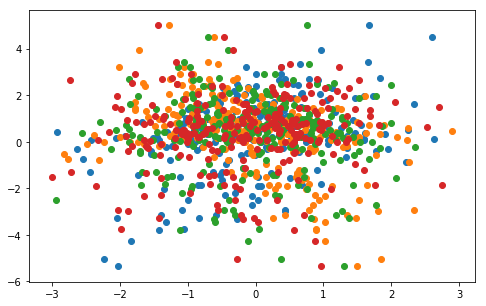

In [11]:
m_X, a_t = get_data() # Call the function to get the data
plot_data(figsize=(8, 5)) 

Beautiful plot of the data points on the x-axis and targets on the y-axis. 

# Be careful, the code below takes a minute

In [5]:
import time
start = time.time()
param_grid={'n_estimators': np.arange(35,43), #[20,30,35,37,40,42,45,50],
    'learning_rate': [0.09,0.10,0.11,0.12], #[0.05,0.1,0.5,1.0],# 0.05, 0.02, 0.01],
    'max_depth':[4,5,6,7],
    'min_samples_leaf':[2,3,4,5],
    'subsample': [0.8,0.825,0.85,0.875,0.9] #np.linspace(0.7,1.0,4)
           } 
n_jobs=11
cv,best_est= GradientBooster(param_grid, n_jobs)
end = time.time()
print("This took " + str(end - start) + " seconds")


Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, presort='auto', random_state=None,
             subsample=0.825, verbose=0, warm_start=False)
This took 68.23999190330505 seconds


Above we define the parameter grid with candidates for the best tuning parameters of our model.

Furthermore we set number of parallel jobs to 12 to reduce overall waiting time as the search takes a while to evaluate

In [19]:
#OK great, so we got back the best estimator parameters as follows:
print( "Best Estimator Parameters")
print("---------------------------")
print ("n_estimators: %d" %best_est.n_estimators)
print ("max_depth: %d" %best_est.max_depth)
print ("Learning Rate: %.2f" %best_est.learning_rate)
print( "min_samples_leaf: %d" %best_est.min_samples_leaf)
print ("subsample: %.2f" %best_est.subsample)
print()
print("Parameter prediction power:")
print(best_est.feature_importances_)
print()
print ("Train R-squared: %.3f" %best_est.score(m_X,a_t))

# Evaluate a score by cross-validation
scores = cross_val_score(best_est, m_X, a_t)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Best Estimator Parameters
---------------------------
n_estimators: 40
max_depth: 5
Learning Rate: 0.10
min_samples_leaf: 4
subsample: 0.82

Parameter prediction power:
[ 0.2842403   0.25546792  0.26107353  0.1051128   0.09410545]

Train R-squared: 0.976
Accuracy: 0.799 (+/- 0.04)


How do we know we are 'good'? We check it by this nice library given function "cross_val_score".  

In the basic approach, called k-fold CV, the training set is split into k smaller sets. The following procedure is followed for each of the k "folds":

- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop

In [20]:
#import pickle
from sklearn.externals import joblib
#savedModelStr = pickle.dumps(best_est)
joblib.dump(best_est, 'best_est.pkl', compress = 1) 

['best_est.pkl']

Save the best model into a file, so it can be used later

## How good can we fit the unseen training data

a perfect alignment with the y=x line (german: 'Achsenhalbierende') would implicate R^2 = 1 and a perfect prediction for unseen data. This would be nice! But we have noise, so no chance

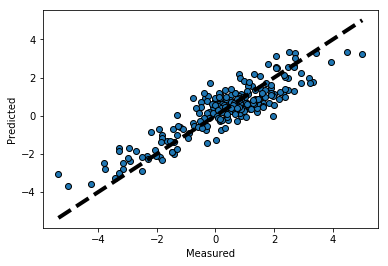

In [21]:
y_pred_1 = cross_val_predict(best_est, m_X, a_t)
plot_predictions(y_pred_1)

## How good can we fit the seen training data

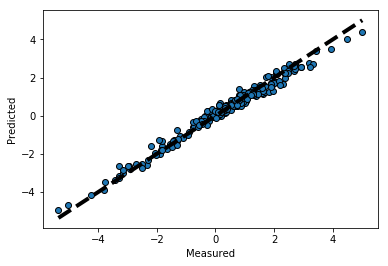

In [22]:
y_pred_2 = best_est.predict(m_X)
plot_predictions(y_pred_2)

# Code to generate the prediction

This is what generates the prediction for the exercise

In [23]:
best_est = joblib.load('best_est.pkl')
m_X_test = get_test_data() # Call the function to get the data
a_y = best_est.predict(m_X_test)
np.savetxt('comp_testY.dat', a_y, fmt='%.5f')
print("Written to file 'comp_testY.dat'.")
print(a_y)

Written to file 'comp_testY.dat'.
[  3.48536429e-01  -2.43400564e+00   9.80583106e-01   1.49034150e+00
   3.91719106e-01   1.10179114e+00   1.11148125e-02  -7.42316130e-01
   1.11196382e+00   4.13725601e-01   3.96887078e+00  -2.62414181e+00
   5.20794031e-01   8.63211053e-01   4.43503172e-01  -2.73530164e+00
  -1.38846798e+00   5.33833937e-01   1.43491318e-01   6.58849033e-01
  -1.73154313e+00  -1.06300098e+00  -2.81220762e+00  -2.12938009e+00
   8.07147017e-01  -2.04013746e+00   2.61706722e+00   2.63887640e-01
  -2.46100776e-01   1.76956963e-01   2.01457307e+00  -4.09590658e-02
   9.08538530e-01   2.60655413e+00  -2.98926728e+00  -2.50329590e+00
   3.68232125e+00   5.05032491e-01   3.77952388e-01  -2.51159630e+00
   1.31366980e+00  -3.44017777e+00   1.22090505e+00   9.61239511e-01
   1.34390083e+00   7.07552819e-01   6.12173825e-01   2.97497620e+00
   2.17512547e+00   1.47749312e-01   1.17719940e-01  -2.58880011e+00
   1.32243550e+00   4.53939615e-02   1.59744531e+00   7.39244688e-01


# References

A Kaggle Master Explains Gradient Boosting | No Free Hunch
[http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

Gradient Boosted Regression Trees
https://www.datarobot.com/blog/gradient-boosted-regression-trees/

